# Classification of dummy data using various classifers

### Import  necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [3]:
train1 = pd.read_csv("train.csv")

In [4]:
train1.shape

(220, 5)

In [5]:
train1.head()

,Number of soldiers,Number of tanks,Number of aircrafts,Victory Status,Id
0,2100000,4480,70,1,0
1,2100000,4550,0,1,2
2,2170000,4130,140,1,3
3,2170000,4550,280,1,4
4,2310000,4060,700,1,5


### Check for empty cells

In [6]:
train1.isnull().sum()

Number of soldiers     0
Number of tanks        0
Number of aircrafts    0
Victory Status         0
Id                     0
dtype: int64

### Plotting the Correlation Heat Map for visualization

<AxesSubplot:>

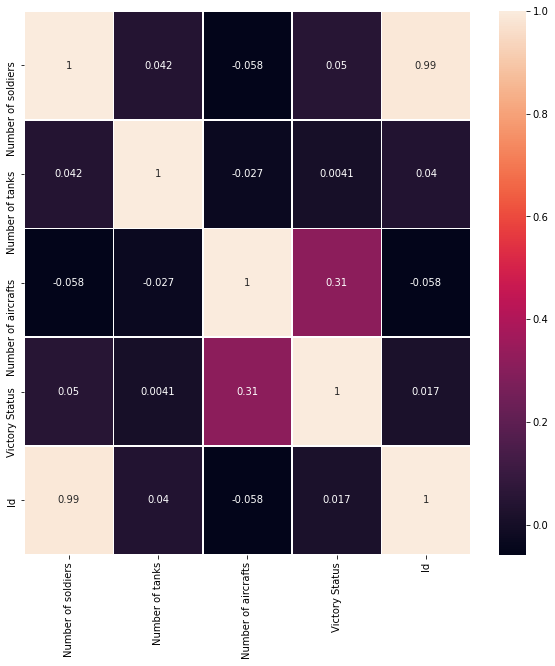

In [7]:
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(train1.corr(),annot=True , linewidths=.5)

### Checking more information about the data

In [8]:
train1.describe()

,Number of soldiers,Number of tanks,Number of aircrafts,Victory Status,Id
count,2.200000e+02,220.000000,220.000000,220.000000,220.000000
mean,3.721773e+06,4392.181818,291.772727,1.272727,159.072727
std,7.308487e+05,223.459237,527.975407,0.446377,86.412487
min,2.100000e+06,4060.000000,0.000000,1.000000,0.000000
25%,3.150000e+06,4200.000000,0.000000,1.000000,86.750000
50%,3.710000e+06,4410.000000,70.000000,1.000000,162.000000
75%,4.270000e+06,4550.000000,350.000000,2.000000,233.250000
max,5.460000e+06,4830.000000,3640.000000,2.000000,304.000000


In [9]:
train1.corr() #correlation in the dataset

,Number of soldiers,Number of tanks,Number of aircrafts,Victory Status,Id
Number of soldiers,1.000000,0.041843,-0.058171,0.049879,0.991331
Number of tanks,0.041843,1.000000,-0.026661,0.004078,0.039944
Number of aircrafts,-0.058171,-0.026661,1.000000,0.314525,-0.058490
Victory Status,0.049879,0.004078,0.314525,1.000000,0.017122
Id,0.991331,0.039944,-0.058490,0.017122,1.000000


In [10]:
val1 = train1.drop(['Victory Status','Id','Number of tanks'],axis=1)
#drop unnecessary columns 

### Import MinMaxScaler() from sklearn library for normalising the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
mnmx = MinMaxScaler()

### Classified Column

In [12]:
val2 = train1['Victory Status']

### Columns with the training parameters

In [13]:
df_numcols = pd.DataFrame(mnmx.fit_transform(val1.iloc[:]),
columns = val1.iloc[:].columns.tolist())
print(df_numcols.describe())

       Number of soldiers  Number of aircrafts
count          220.000000           220.000000
mean             0.482670             0.080157
std              0.217514             0.145048
min              0.000000             0.000000
25%              0.312500             0.000000
50%              0.479167             0.019231
75%              0.645833             0.096154
max              1.000000             1.000000


### Import necessary components and split the dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_numcols, 
                                                    val2,test_size=0.49,
                                                    random_state=40) 
#df_numcols is the training prameters while val2 is the output for each

### Using Logistic Regression for classification

In [16]:
from sklearn.linear_model import LogisticRegression
LR  = LogisticRegression()
LR.fit(X_train,y_train)
predictions= LR.predict(X_test)

In [17]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))

Accuracy score:  0.8148148148148148
Precision score:  0.8113207547169812


### Using Naive Bayes for classification

In [18]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train,y_train)
predictions= NB.predict(X_test)

In [19]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))

Accuracy score:  0.7962962962962963
Precision score:  0.7962962962962963


### Using SVM Classifier

In [20]:
from sklearn import svm
SVC_model = svm.SVC()
SVC_model.fit(X_train, y_train)
predictions = SVC_model.predict(X_test)

In [21]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))

Accuracy score:  0.8148148148148148
Precision score:  0.851063829787234


### Using Random Forest for classification

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000) #n_estimators = number of trees in the forest
clf.fit(X_train,y_train)
predictions= clf.predict(X_test)

In [23]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))

Accuracy score:  0.6851851851851852
Precision score:  0.825
